In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [3]:
df=pd.read_csv("train.csv")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [9]:
df.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [11]:
print(f"Jumlah record        : {df.shape[0]}")
print(f"Jumlah attribute     : {df.shape[1]}")
print(f"Nama attribute       : {df.columns.tolist()}")
print(f"Jumlah attribute angka: {df.select_dtypes(include=['number']).shape[1]} (karena semua atributnya numerik)")

Jumlah record        : 2000
Jumlah attribute     : 21
Nama attribute       : ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range']
Jumlah attribute angka: 21 (karena semua atributnya numerik)


In [21]:
print("Kolom blue")
print("Jumlah 0 =", (df["blue"] == 0).sum())
print("Jumlah 1 =", (df["blue"] == 1).sum())
print()

print("Kolom dual_sim")
print("Jumlah 0 =", (df["dual_sim"] == 0).sum())
print("Jumlah 1 =", (df["dual_sim"] == 1).sum())
print()

print("Kolom four_g")
print("Jumlah 0 =", (df["four_g"] == 0).sum())
print("Jumlah 1 =", (df["four_g"] == 1).sum())
print()

print("Kolom three_g")
print("Jumlah 0 =", (df["three_g"] == 0).sum())
print("Jumlah 1 =", (df["three_g"] == 1).sum())
print()

print("Kolom touch_screen")
print("Jumlah 0 =", (df["touch_screen"] == 0).sum())
print("Jumlah 1 =", (df["touch_screen"] == 1).sum())
print()

print("Kolom wifi")
print("Jumlah 0 =", (df["wifi"] == 0).sum())
print("Jumlah 1 =", (df["wifi"] == 1).sum())

Kolom blue
Jumlah 0 = 1010
Jumlah 1 = 990

Kolom dual_sim
Jumlah 0 = 981
Jumlah 1 = 1019

Kolom four_g
Jumlah 0 = 957
Jumlah 1 = 1043

Kolom three_g
Jumlah 0 = 477
Jumlah 1 = 1523

Kolom touch_screen
Jumlah 0 = 994
Jumlah 1 = 1006

Kolom wifi
Jumlah 0 = 986
Jumlah 1 = 1014


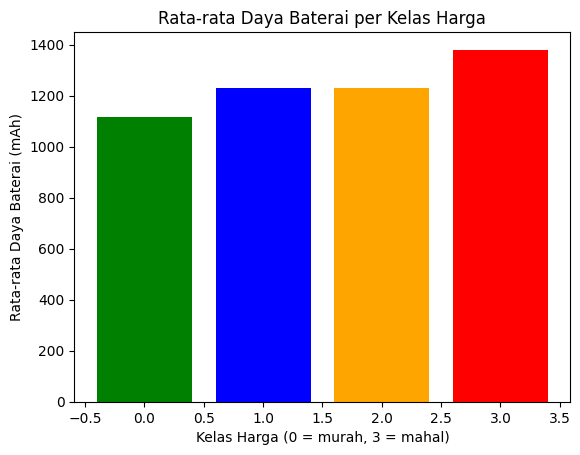

In [23]:
data = df.groupby('price_range').mean()

x = data.index   # price_range (0 = murah, 3 = mahal)
y = data['battery_power']  # ambil rata-rata battery_power

plt.bar(x, y, color=['green', 'blue', 'orange', 'red'])
plt.title('Rata-rata Daya Baterai per Kelas Harga')
plt.xlabel('Kelas Harga (0 = murah, 3 = mahal)')
plt.ylabel('Rata-rata Daya Baterai (mAh)')
plt.show()

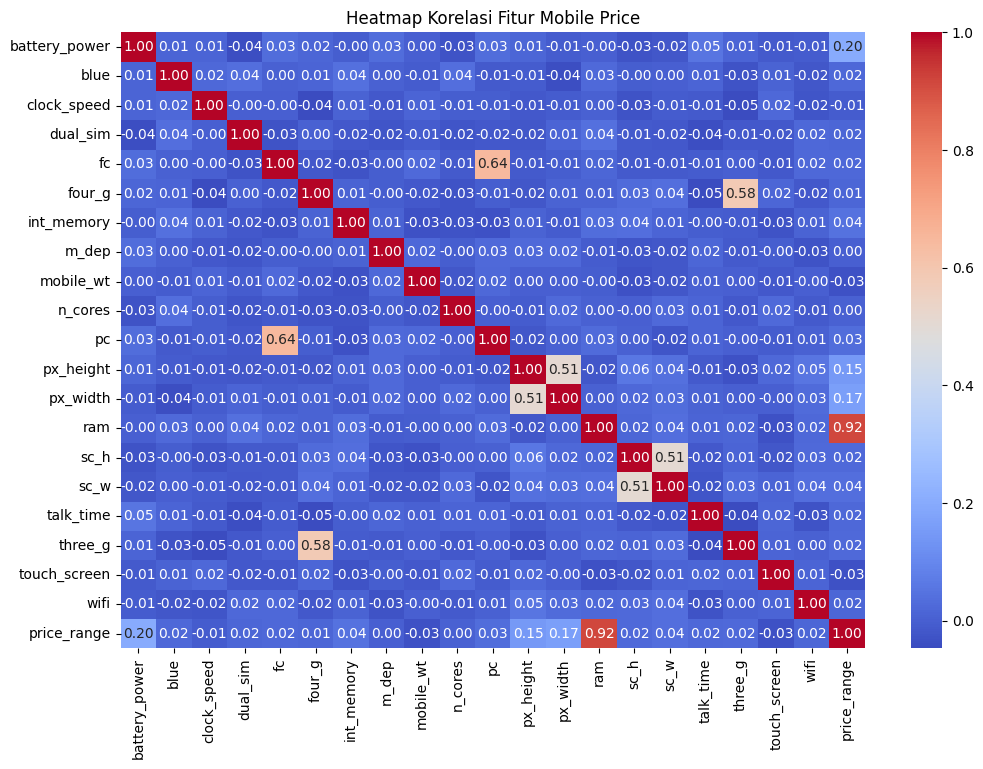

In [22]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Heatmap Korelasi Fitur Mobile Price")
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6836\2946534018.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="price_range", y="ram", data=df, palette="viridis")


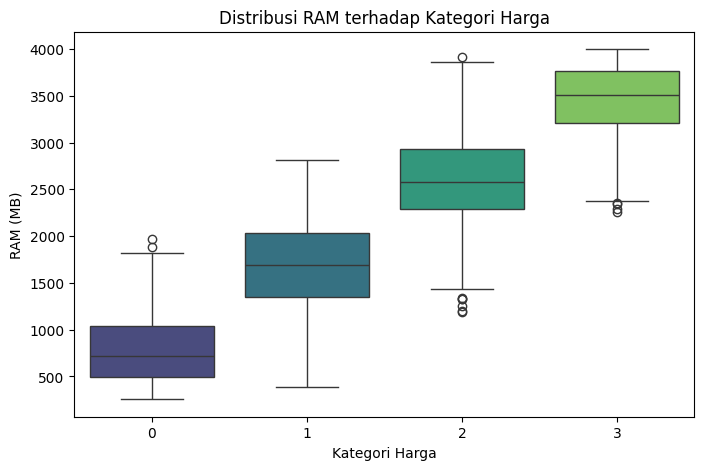

In [18]:
plt.figure(figsize=(8,5))
sns.boxplot(x="price_range", y="ram", data=df, palette="viridis")
plt.title("Distribusi RAM terhadap Kategori Harga")
plt.xlabel("Kategori Harga")
plt.ylabel("RAM (MB)")
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6836\578010202.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="price_range", y="battery_power", data=df, palette="magma")


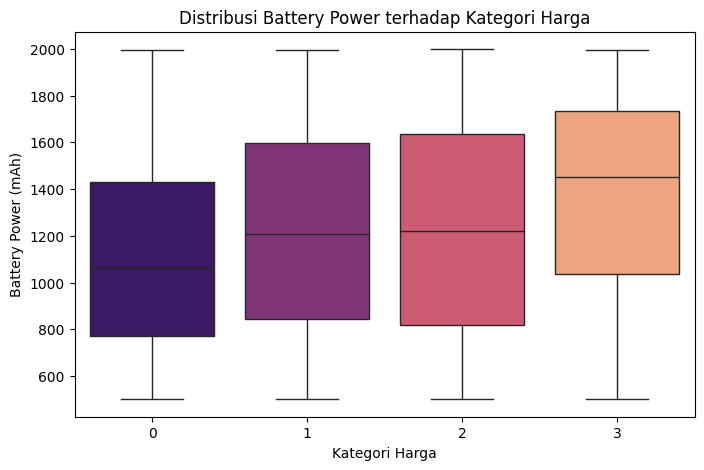

In [19]:
plt.figure(figsize=(8,5))
sns.boxplot(x="price_range", y="battery_power", data=df, palette="magma")
plt.title("Distribusi Battery Power terhadap Kategori Harga")
plt.xlabel("Kategori Harga")
plt.ylabel("Battery Power (mAh)")
plt.show()

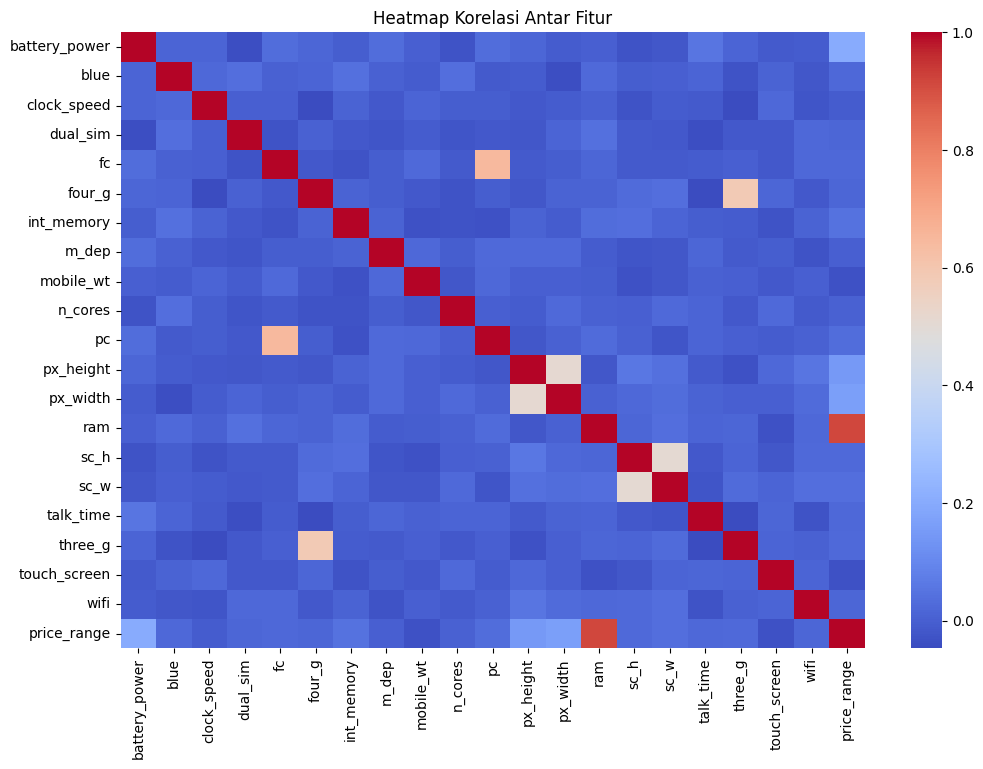

# Kesimpulan Dataset Mobile Price Classification

In [ ]:
1. Struktur Data yang Kokoh dan Siap untuk Pemodelan
Dataset ini memiliki fondasi yang kuat untuk analisis lebih lanjut. Dengan 20 fitur dan 1 target, strukturnya jelas dan terdefinisi dengan baik. Keseimbangan yang diamati pada fitur-fitur biner (seperti blue, dual_sim, wifi), di mana nilai mean berkisar antara 0.49 hingga 0.52, merupakan aset berharga. Distribusi yang hampir merata antara ponsel yang memiliki dan tidak memiliki fitur-fitur ini mencegah model machine learning menjadi bias terhadap satu kondisi tertentu, sehingga menghasilkan model yang lebih general dan robust.

2. Dominasi Spesifikasi Kinerja sebagai Penentu Harga Utama
Analisis statistik deskriptif dan visual (melalui boxplot dan grafik batang) secara konsisten mengungkap pola yang tegas: terdapat korelasi positif yang kuat antara spesifikasi teknis utama dengan kelas harga.

RAM (ram) muncul sebagai pembeda paling signifikan. Peningkatan kapasitas RAM secara jelas dan linear diikuti oleh peningkatan kelas harga. Hal ini secara rasional mencerminkan permintaan pasar akan kinerja multitasking yang lancar dan kemampuan menjalankan aplikasi yang semakin kompleks, yang membuat RAM menjadi indikator nilai produk yang paling langsung.

Daya Baterai (battery_power) merupakan faktor krusial kedua. Rata-rata daya baterai yang lebih tinggi secara konsisten ditemukan pada kelas harga yang lebih tinggi. Temuan ini selaras dengan kebutuhan pengguna modern akan ketahanan daya (battery life) yang lebih panjang, yang menjadi salah satu fitur yang paling dihargai.

Kualitas Tampilan (px_height dan px_width) juga berkontribusi. Resolusi layar yang lebih tinggi, yang menghasilkan ketajaman gambar yang lebih baik, juga menunjukkan korelasi dengan harga yang lebih tinggi, meskipun pengaruhnya mungkin tidak sekuat RAM dan baterai.

3. Fitur Biner sebagai Penambah Nilai, Bukan Penentu Harga
Fitur-fitur biner yang merepresentasikan kelengkapan fitur (seperti Bluetooth, Wi-Fi, Layar Sentuh, dan konektivitas 3G/4G) menunjukkan dinamika yang berbeda. Pengaruhnya terhadap variasi harga ternyata jauh lebih rendah dibandingkan dengan fitur performa. Hal ini mengindikasikan bahwa dalam konteks pasar yang tercermin dari dataset ini, fitur-fitur tersebut telah menjadi standar dasar (table stakes) atau komoditas. Keberadaannya diharapkan di hampir semua ponsel, sehingga tidak lagi menjadi faktor pembeda harga yang utama, melainkan lebih sebagai penambah nilai (value-added features) yang melengkapi produk.

4. Implikasi Strategis untuk Pengembangan Model Prediktif
Temuan-temuan di atas memberikan panduan yang jelas untuk tahap pemodelan selanjutnya:

Fitur Prioritas Tinggi: Fitur-fitur seperti ram, battery_power, dan gabungan metrik resolusi layar (px_height & px_width) harus menjadi fokus utama dalam rekayasa fitur (feature engineering) dan seleksi model, karena mereka memegang daya penjelas (explanatory power) terbesar.

Fitur Pendukung: Fitur-fitur biner dapat dipertahankan dalam model. Meskipun pengaruhnya individual kecil, secara kolektif mereka dapat memberikan konteks tambahan yang memperhalus akurasi prediksi, terlebih lagi karena distribusinya yang seimbang tidak akan mengganggu stabilitas model.

Pendekatan Analitis: Metode visualisasi seperti boxplot dan heatmap korelasi telah terbukti sangat efektif dalam mengidentifikasi hubungan-hubungan kunci ini dan harus terus digunakan untuk memvalidasi asumsi selama pengembangan model.

#Posttest 3#

In [25]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [6]:
duplicate_count = df.duplicated().sum()
print("\nJumlah data duplikat:", duplicate_count)


Jumlah data duplikat: 0


In [14]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outlier_mask = (df_cleaned < lower_bound) | (df_cleaned > upper_bound)
outlier_counts = outlier_mask.sum()

print("\n=== JUMLAH OUTLIER PER KOLOM ===")
print(outlier_counts[outlier_counts > 0])

df_no_outlier = df_cleaned[~(outlier_mask.any(axis=1))]
print("\nJumlah data setelah hapus outlier:", len(df_no_outlier))


=== JUMLAH OUTLIER PER KOLOM ===
fc            18
px_height      2
three_g      477
dtype: int64

Jumlah data setelah hapus outlier: 1506


Outlier adalah data yang nilainya jauh berbeda dari sebagian besar data lainnya.  
Jika tidak ditangani, outlier dapat memengaruhi hasil analisis dan model machine learning.  
Di sini digunakan metode IQR (Interquartile Range) untuk mendeteksi dan menghapus outlier:
- Hitung Q1 (kuartil 25%) dan Q3 (kuartil 75%)
- Hitung IQR = Q3 - Q1
- Tentukan batas bawah dan atas:
  - Lower Bound = Q1 - 1.5 * IQR
  - Upper Bound = Q3 + 1.5 * IQR
- Hapus data yang berada di luar rentang tersebut

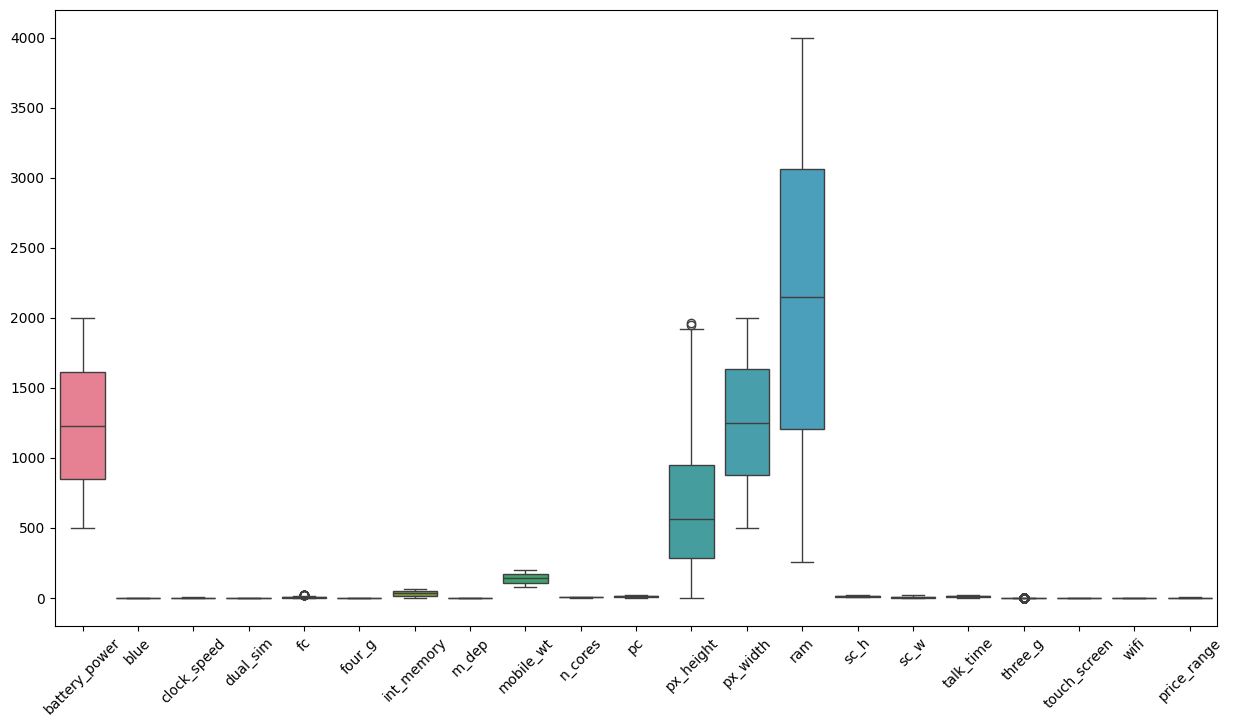

In [11]:
plt.figure(figsize=(15, 8))  
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

Nah, di tahap ini kita bersihin datanya biar dipastikan nggak ada data yang kosong (missing value), data ganda (duplikat), atau data aneh yang ekstrem (outlier). Untuk dataset mobile price classification-nya sendiri, ternyata udah bersih dari data kosong, jadi kita nggak perlu ngisi data yang hilang (imputasi). Data-data yang ketemu ganda juga kita hapus biar kualitas datanya tetap terjaga.

In [32]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop('price_range', axis=1))

df_scaled = pd.DataFrame(df_scaled, columns=df.columns[:-1])
df_scaled['price_range'] = df['price_range']
df_scaled.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,...,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2000.000000
mean,2.149392e-16,-1.243450e-17,-1.545430e-16,8.082424e-17,5.861978e-17,1.048051e-16,-9.592327e-17,-1.030287e-16,1.278977e-16,-7.727152e-17,...,1.181277e-16,6.084022e-17,-1.811884e-16,4.884981e-17,-5.506706e-17,1.421085e-16,1.421085e-17,-5.417888e-17,1.421085e-17,1.500000
std,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,...,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.118314
min,-1.678817e+00,-9.900495e-01,-1.253064e+00,-1.019184e+00,-9.928904e-01,-1.043966e+00,-1.656260e+00,-1.393304e+00,-1.702391e+00,-1.539175e+00,...,-1.454027e+00,-1.739251e+00,-1.722711e+00,-1.734608e+00,-1.324131e+00,-1.649584e+00,-1.786861e+00,-1.006018e+00,-1.014099e+00,0.000000
25%,-8.804033e-01,-9.900495e-01,-1.007906e+00,-1.019184e+00,-7.624947e-01,-1.043966e+00,-8.845346e-01,-1.046495e+00,-8.829695e-01,-6.647678e-01,...,-8.167289e-01,-8.719579e-01,-8.453168e-01,-7.849833e-01,-8.649215e-01,-9.173306e-01,5.596406e-01,-1.006018e+00,-1.014099e+00,0.750000
50%,-2.849593e-02,-9.900495e-01,-2.727384e-02,9.811771e-01,-3.017032e-01,9.578860e-01,-2.563229e-03,-6.069151e-03,2.122020e-02,-2.275644e-01,...,-1.828116e-01,-1.045034e-02,2.055123e-02,-7.276497e-02,-1.761069e-01,-2.013697e-03,5.596406e-01,9.940179e-01,9.860966e-01,1.500000
75%,8.575560e-01,1.010051e+00,8.307794e-01,9.811771e-01,6.198797e-01,9.578860e-01,8.794082e-01,1.034357e+00,8.406421e-01,1.084046e+00,...,6.810064e-01,8.828792e-01,8.670548e-01,8.768595e-01,7.423125e-01,9.133032e-01,5.596406e-01,9.940179e-01,9.860966e-01,2.250000
max,1.728812e+00,1.010051e+00,1.811412e+00,9.811771e-01,3.384628e+00,9.578860e-01,1.761380e+00,1.727974e+00,1.688320e+00,1.521249e+00,...,2.963672e+00,1.727608e+00,1.727851e+00,1.589078e+00,2.808756e+00,1.645557e+00,5.596406e-01,9.940179e-01,9.860966e-01,3.000000


Selanjutnya, kita lakukan standarisasi pake StandardScaler biar semua fitur numerik punya skala yang seragam—rata-ratanya jadi 0 dan standar deviasinya 1. Dengan begitu, model machine learning nggak akan berat sebelah atau bias sama fitur yang nilai angkanya gede-gede.

In [59]:
le = LabelEncoder()

categorical_cols = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])
    
df[categorical_cols]

,blue,dual_sim,four_g,three_g,touch_screen,wifi
0,0,0,0,0,0,1
1,1,1,1,1,1,0
2,1,1,1,1,1,0
3,1,0,0,1,0,0
4,1,0,1,1,1,0
...,...,...,...,...,...,...
1995,1,1,1,1,1,0
1996,1,1,0,1,1,1
1997,0,1,1,1,1,0
1998,0,0,1,1,1,1


Oke, untuk langkah ini kita ubah variabel kategorinya—kaya blue, dual_sim, four_g, three_g, touch_screen, dan wifi—menjadi bentuk angka pake LabelEncoder.

In [16]:
df['screen_area'] = df['px_height'] * df['px_width']
df['battery_efficiency'] = df['battery_power'] / df['mobile_wt']
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,screen_area,battery_efficiency
0,842,0,2.2,0,1,0,7,0.6,188,2,...,2549,9,7,19,0,0,1,1,15120,4.478723
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,2631,17,3,7,1,1,0,2,1799140,7.507353
2,563,1,0.5,1,2,1,41,0.9,145,5,...,2603,11,2,9,1,1,0,2,2167308,3.882759
3,615,1,2.5,0,0,0,10,0.8,131,6,...,2769,16,8,11,1,0,0,2,2171776,4.694656
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1411,8,2,15,1,1,0,1,1464096,12.914894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,668,13,4,19,1,1,0,0,2309580,7.490566
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,2032,11,10,16,1,1,1,2,1797975,10.508021
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,3057,9,1,5,1,1,0,3,1416576,17.694444
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,869,18,10,19,1,1,1,0,225120,10.427586


Oke, kita tambahin dua fitur baru nih: screen_area buat ngasih info tentang luas layar, sama battery_efficiency buat ngukur seberapa efisien baterainya terhadap berat ponsel. Dengan tambahan fitur ini, semoga modelnya jadi lebih jago ngebedain kategori harganya.

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Jumlah data training:", X_train.shape[0])
print("Jumlah data testing:", X_test.shape[0])

Jumlah data training: 1600
Jumlah data testing: 400


Datasetnya dibagi jadi 80:20 - 80% buat training dan 20% buat testing. Jadi model bisa belajar dengan cukup data sekaligus tetap ada data baru buat evaluasi performa.

##POSTTEST 4##

In [9]:
X = df.drop(columns=['price_range'])
y = df['price_range']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Metode SVC bekerja dengan mencari garis pemisah terbaik (hyperplane) antara kelas-kelas data. Nilai akurasi menunjukkan seberapa tepat model dalam mengklasifikasi data uji, sedangkan *precision*, *recall*, dan *f1-score* menggambarkan performa model pada tiap kelas.

=== Support Vector Classifier (SVC) ===
Accuracy: 0.8925

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94       105
           1       0.80      0.89      0.84        91
           2       0.84      0.82      0.83        92
           3       0.96      0.92      0.94       112

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.90      0.89      0.89       400



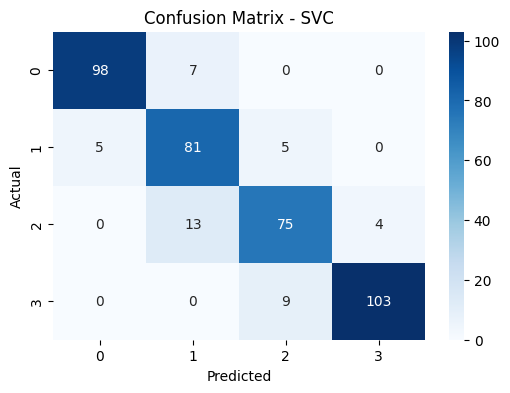

In [11]:
svc = SVC(kernel='rbf', random_state=42)
svc.fit(X_train_scaled, y_train)

y_pred_svc = svc.predict(X_test_scaled)

print("=== Support Vector Classifier (SVC) ===")
print("Accuracy:", accuracy_score(y_test, y_pred_svc))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svc))

cm_svc = confusion_matrix(y_test, y_pred_svc)
plt.figure(figsize=(6,4))
sns.heatmap(cm_svc, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - SVC")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Random Forest membentuk banyak *decision tree* dan mengambil hasil voting mayoritas.  
Keunggulannya adalah lebih tahan terhadap *overfitting* dan dapat menangani data kompleks dengan baik.

=== Random Forest Classifier ===
Accuracy: 0.8925

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96       105
           1       0.89      0.87      0.88        91
           2       0.78      0.87      0.82        92
           3       0.94      0.87      0.90       112

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.90      0.89      0.89       400



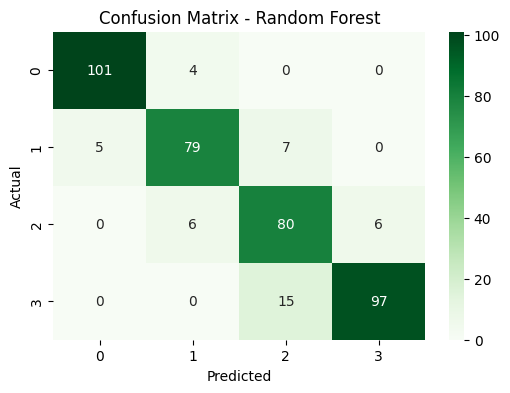

In [10]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

y_pred_rf = rfc.predict(X_test)

print("=== Random Forest Classifier ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Evaluasi model bertujuan untuk mengetahui seberapa baik performa model klasifikasi dalam memprediksi label data.  
Pada tugas ini, digunakan dua model yaitu Support Vector Classifier (SVC) dan Random Forest Classifier.  
Kedua model dievaluasi menggunakan Confusion Matrix, Classification Report, dan Accuracy Score agar hasilnya lebih komprehensif.

Confusion Matrix
Confusion Matrix adalah tabel yang menggambarkan hasil prediksi model dibandingkan dengan data aktual.  
Setiap baris merepresentasikan kelas aktual, sementara kolom menunjukkan kelas hasil prediksi.

Dari Confusion Matrix, kita dapat melihat jumlah:
- True Positive (TP): Prediksi benar untuk kelas positif.  
- True Negative (TN): Prediksi benar untuk kelas negatif.  
- False Positive (FP): Model memprediksi positif, padahal seharusnya negatif.  
- False Negative (FN): Model memprediksi negatif, padahal seharusnya positif.  

Confusion Matrix membantu mengidentifikasi kelas mana yang sering salah diprediksi, bukan hanya sekadar nilai akurasi keseluruhan.

Classification Report
Classification Report menampilkan metrik penting seperti:
- Precision → Ketepatan model dalam memprediksi kelas tertentu.  
  Rumus: Precision = TP / (TP + FP)
- Recall (Sensitivity) → Seberapa banyak data aktual positif yang berhasil dikenali oleh model.  
  Rumus: Recall = TP / (TP + FN)
- F1-Score → Rata-rata harmonis antara precision dan recall.  
  Rumus: F1 = 2 * (Precision * Recall) / (Precision + Recall)
- Accuracy → Proporsi total prediksi yang benar dari semua data.  
  Rumus: Accuracy = (TP + TN) / (TP + TN + FP + FN)

Semakin tinggi nilai precision, recall, dan F1-score, semakin baik performa model dalam mengenali dan mengklasifikasi data.

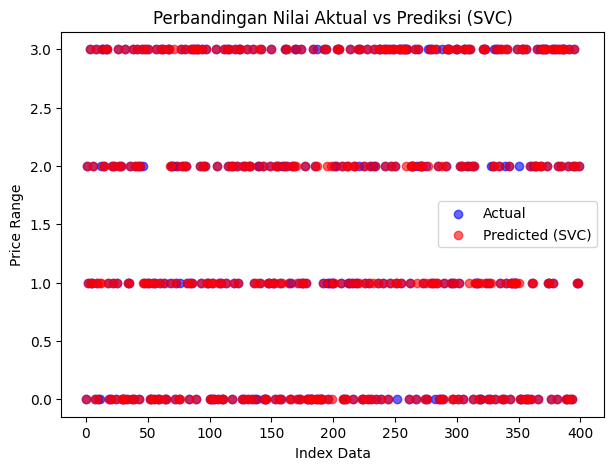

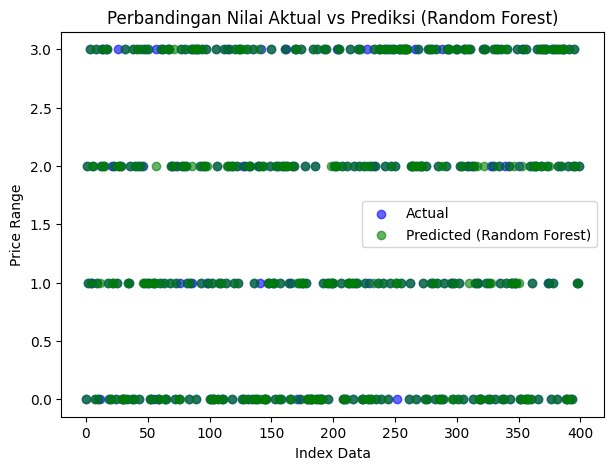

In [16]:
plt.figure(figsize=(7,5))
plt.scatter(range(len(y_test)), y_test, color='blue', alpha=0.6, label='Actual')
plt.scatter(range(len(y_test)), y_pred_svc, color='red', alpha=0.6, label='Predicted (SVC)')
plt.legend()
plt.title("Perbandingan Nilai Aktual vs Prediksi (SVC)")
plt.xlabel("Index Data")
plt.ylabel("Price Range")
plt.show()

plt.figure(figsize=(7,5))
plt.scatter(range(len(y_test)), y_test, color='blue', alpha=0.6, label='Actual')
plt.scatter(range(len(y_test)), y_pred_rf, color='green', alpha=0.6, label='Predicted (Random Forest)')
plt.legend()
plt.title("Perbandingan Nilai Aktual vs Prediksi (Random Forest)")
plt.xlabel("Index Data")
plt.ylabel("Price Range")
plt.show()

Hasil terbaik bisa dibandingkan dari akurasi kedua model.  
Biasanya Random Forest cenderung memberikan hasil yang sedikit lebih tinggi dibanding SVC untuk dataset ini.